### Davido: A Lyrical analysis
This exercise will pull all the songs by 2Face Idibia on Genius.com and run sentiment analysis on the lyrics to determine the sentiment polatiry for the songs.

First we save our genius identification

In [1]:
genius_client_id = 'mM_UqRz1pNsawnzq1KJ9aSrvsz3P6wTLARQNongLrcXZpTiRA25ul_xD5gqQTSDo'
genius_secret = 'KyNJWaxnx3TSySHdnnA07E5Abw1G5X--SPz33sBJ65XdQni-UKVOYW8owdH9o2lRH7u9ykvml9_4jEghf7qnZw'
genius_token = 'W7RIDSht2rGxPSp4c6R2xwXMeEu6nWJvgedjI_a9ANczFGlkDz6JkHSfkXtsehnH'

Then we import the required libraries.

In [2]:
import lyricsgenius
import pandas as pd
import json
import nltk
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

We then save the genius request

In [3]:
genius = lyricsgenius.Genius(genius_token)

In [5]:
davido = genius.search_artist("davido", sort="popularity")

Searching for songs by davido...

Changing artist name to 'Davido'
Song 1: "If"
Song 2: "Fall"
Song 3: "FIA"
Song 4: "Assurance"
Song 5: "Risky"
Song 6: "Coolest Kid in Africa"
Song 7: "Fans Mi"
Song 8: "Sweet in the Middle"
Song 9: "Pere"
Song 10: "Flora My Flawa"
Song 11: "Like Dat"
Song 12: "D & G"
Song 13: "If (Remix)"
Song 14: "Aye"
Song 15: "Dami Duro"
Song 16: "Disturbance"
Song 17: "How Long?"
Song 18: "Wonder Woman"
Song 19: "Intro"
Song 20: "Gbagbe Oshi"
Song 21: "1 Milli"
Song 22: "FIA (Remix)"
Song 23: "Big Picture"
Song 24: "Get To You"
Song 25: "Animashaun"
Song 26: "Owo Ni Koko"
Song 27: "Maga 2 Mugu"
Song 28: "Check Am"
Song 29: "One Thing"
Song 30: "All Of You"
Song 31: "Green Light Riddim"
Song 32: "Gobe"
Song 33: "Skelewu"
Song 34: "Ekuro"
Song 35: "Return"
Song 36: "2020 Letter To You"
Song 37: "The Money"
Song 38: "Companyy"
Song 39: "The Sound"
Song 40: "Back when (feat. naeto c)"
Song 41: "Nwa Baby"
Song 42: "Feel Alright"
Song 43: "One of a Kind"
Song 44: "Numbe

In [6]:
len(davido)

68

In [7]:
davido.save_lyrics()

Wrote `Lyrics_Davido.json`


We will then import that json file and load into "Artist"

In [8]:
with open('Lyrics_Davido.json') as json_file:
    Artist = json.load(json_file)

In [10]:
lyrics = {}
for x in range(len(Artist["songs"])):
    lyrics[Artist["songs"][x]["title"]] = Artist["songs"][x]["lyrics"]

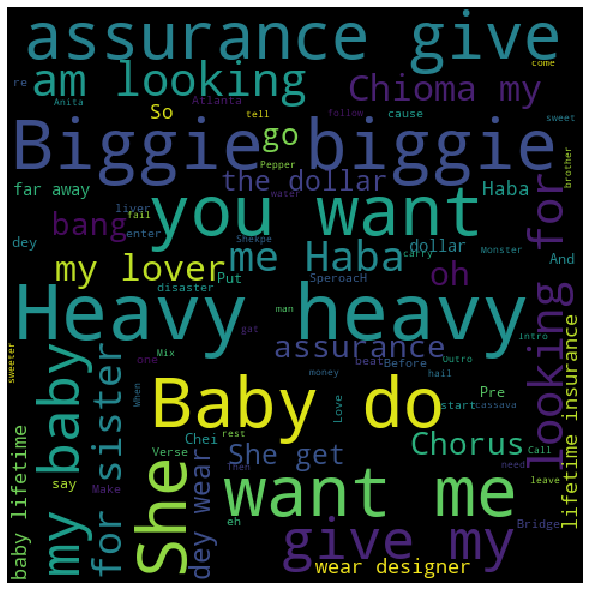

In [20]:
wordcloud = WordCloud(width=480, height=480, margin=0).generate(lyrics['Assurance'])
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

In [13]:
lyrics_songlist = [] #List of all the songs and their lyrics.
for song in lyrics:
    temp = [song, lyrics[song]]
    lyrics_songlist.append(temp)

In [14]:
import pandas as pd
import csv
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

x = 0
with open('davido_scores.csv','w') as f1:
    writer=csv.writer(f1, delimiter=',',lineterminator='\n',)
    for song in lyrics:
        sent = TextBlob(lyrics[song])
        row = (lyrics_songlist[x][0], round(sent.sentiment.polarity,3))
        #row = [i + j*0.2 for j in range(i+1)]
        x = x+1
        writer.writerow(row)

In [16]:
data = pd.read_csv("davido_scores.csv",names = ['Song', 'Score'], encoding='latin-1')
data

Song  Score
0                    If  0.391
1                  Fall  0.266
2                   FIA  0.327
3             Assurance -0.129
4                 Risky  0.102
..                  ...    ...
63        New Skul Tinz -0.017
64            Nwaa Baby -0.198
65  Dollars In The Bank -0.206
66              No Visa  0.115
67     Enter The Centre  0.170

[68 rows x 2 columns]

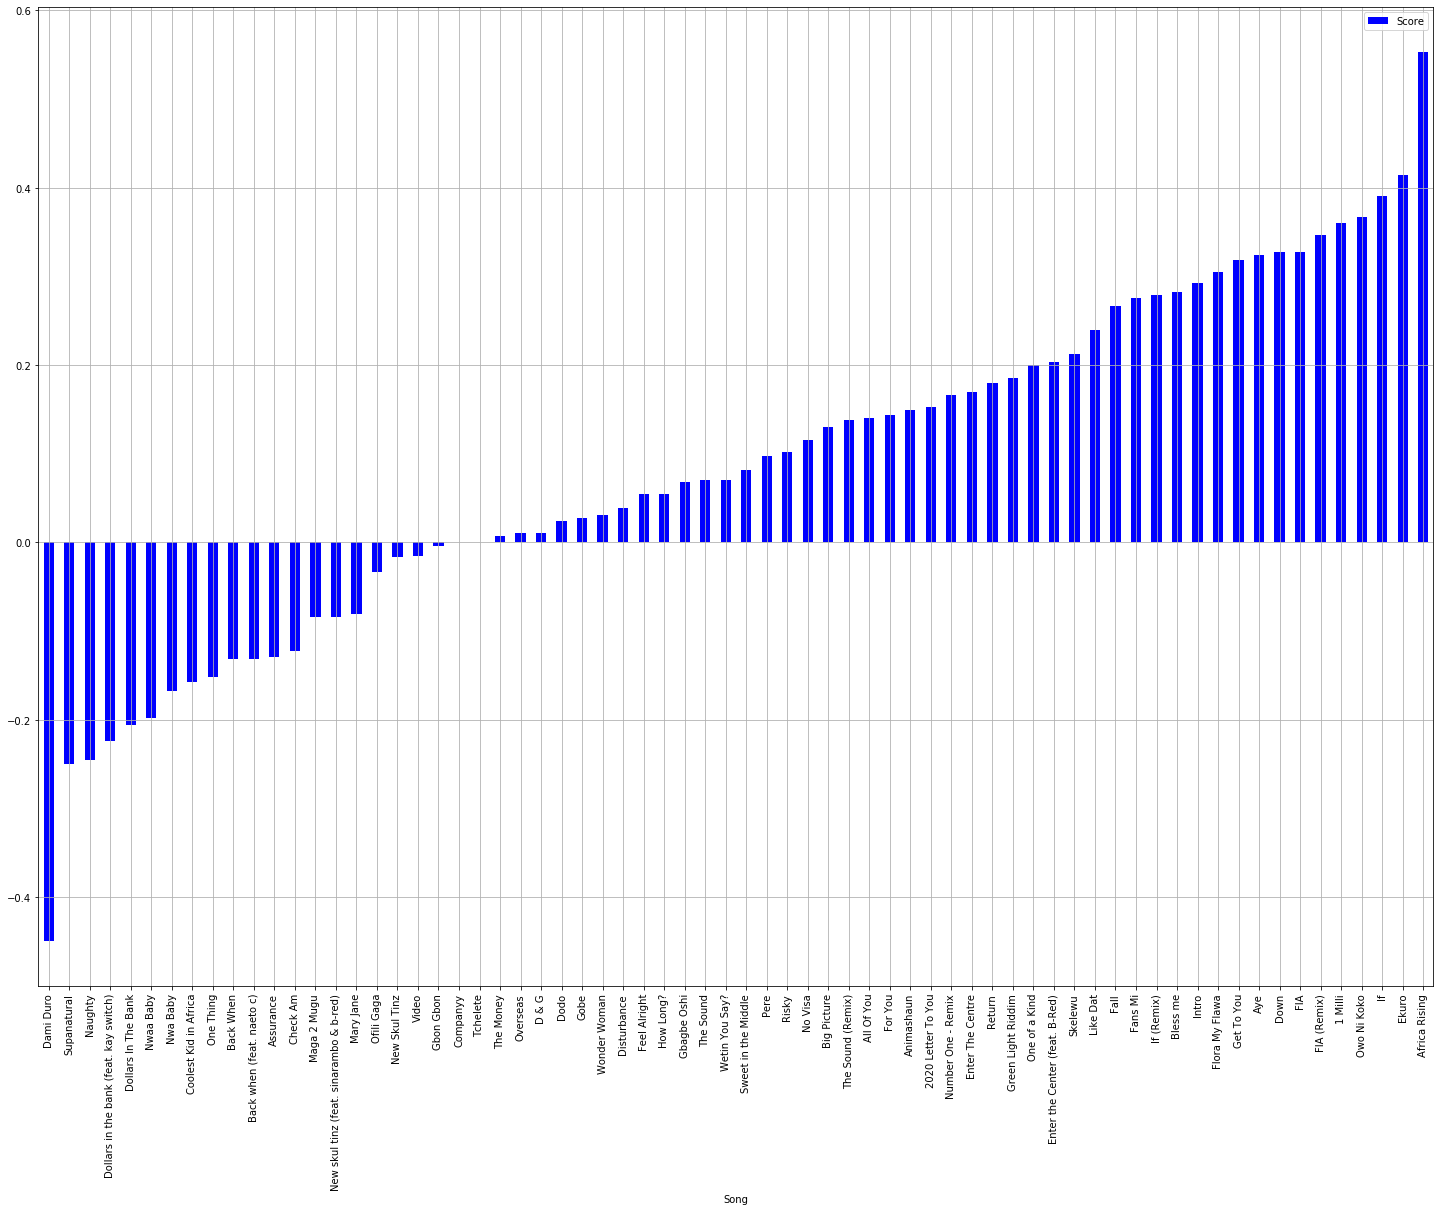

In [19]:
import matplotlib.pyplot as plt
data.sort_values('Score', ascending = True, inplace= True)
data.plot(kind='bar',x='Song',y='Score',color='blue')
plt.rcParams['figure.figsize'] = [40, 25]
plt.grid(b=None, which='major', axis='both')
plt.show()